# Brain Tumor Detection with K-Fold Cross Validation Using Python and SKLearn
Author: Tyler J. Burgee<br>
Course: CIS 481 - Machine Learning<br>
Professor: Jason Miller<br>
Date: 23 October 2023

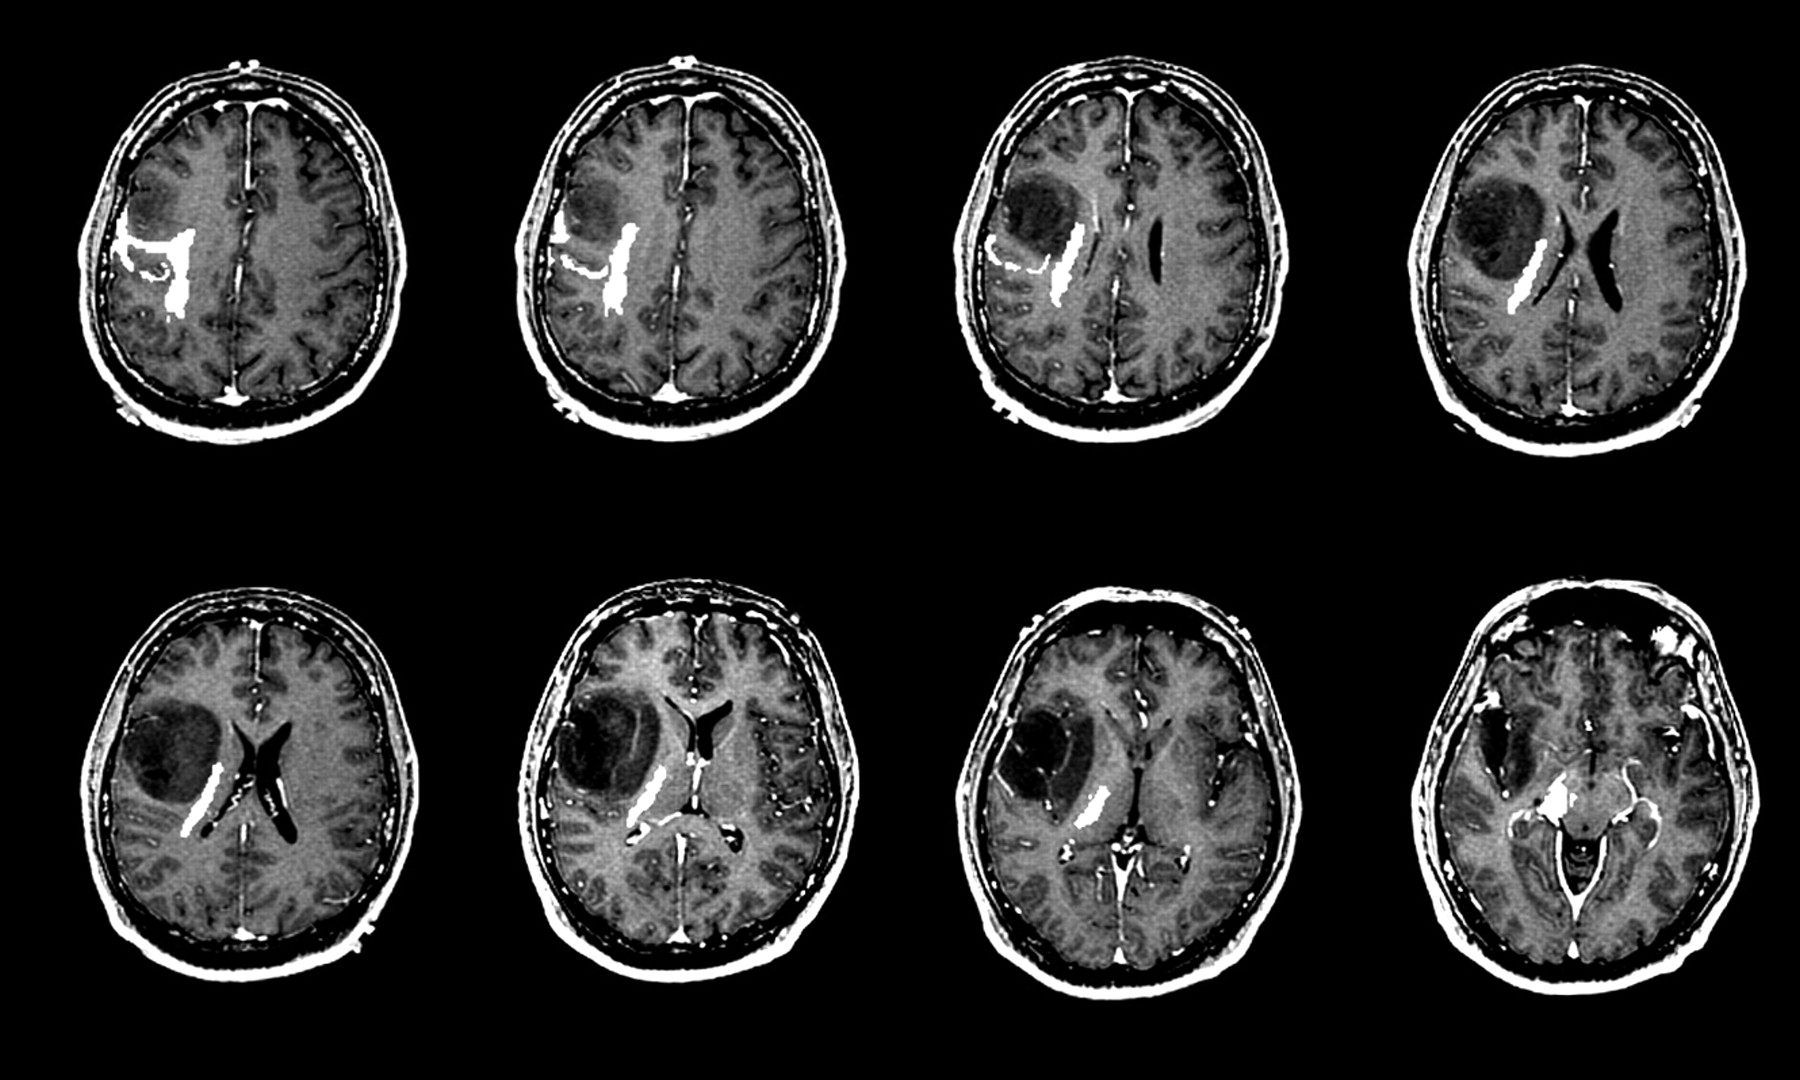

## Downloading the Dataset
The dataset used in this notebook can be downloaded on [Kaggle](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection/).

## About the Dataset
<b>Br35H</b> is a dataset containing various MRI brain scans. The goal is to use these MRI scans to find common patterns among patients with or without brain tumors. The dataset contains <b>3,000 total scans</b>: 1,500 scans of tumorous brains and 1,500 scans of non-tumorous brains. Tumorous scans are placed in the "yes" folder, and non-tumorous scans are placed in the "no" folder.

## Importing Required Modules

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray, save, load
from matplotlib import pyplot as plt
from datetime import datetime
from os import listdir
from os.path import join
import numpy as np

## Converting Dataset Images to Arrays
In order for our model to process an image dataset, we must convert each image to an array. We can do so by iterating over every image in each image directory and converting those photos to arrays via the <b>img_to_array()</b> function in the Keras library.

In [8]:
# Base directory containing all dataset directories
base_dir = 'Brain_Tumors'

X, y = list(), list()

# Load train data
for folder in listdir(base_dir):
    if folder == 'no' or folder == 'yes':
        file_path = join(base_dir, folder)
        for file in listdir(file_path):
            if file.startswith('no'):
                label = 0.0
            elif file.startswith('y'):
                label = 1.0
            image = load_img(join(file_path, file), color_mode='grayscale', target_size=(64, 64))
            # Convert to array
            image = img_to_array(image)
            # Store image array and corresponding label
            X.append(image)
            y.append(label)

# Convert to numpy arrays
X = asarray(X)
y = asarray(y)

print("Dataset Shape:", X.shape, y.shape)

Train Data Shape: (3000, 64, 64, 1) (3000,)


## Splitting Dataset into Train and Test Sets
Before processing our dataset, we must split it into two subsets: train and test. Train will contain images used to train the model, and test will contain images used to evaluate the performance of the model. To split our dataset, we can use the function <b>train_test_split()</b> from Sklearn. This function takes the dataset variables, <i>X</i> and <i>y</i>, and randomly splits them into train and test sets, represented by four variables: X_train, X_test, y_train, y_test. The function's parameter <b>test_size</b> corresponds to the proportion of data to be assigned to the test set. So, if we want to use the 80-20 rule to split the dataset, we can set test_size = 0.2 (i.e., 20%), leaving 80% of the data for the train set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print("Train Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Train Set Shape: (2400, 64, 64, 1) (2400,)
Test Set Shape: (600, 64, 64, 1) (600,)


## Saving Train and Test Arrays to File
Converting all those images to arrays takes a lot of time, so it is a good idea to save the arrays to a file, to be retreived later. This will speed up future program executions.

In [10]:
# Save train data arrays
save('Brain_Tumors_X_train.npy', X_train)
save('Brain_Tumors_y_train.npy', y_train)

# Save test data arrays
save('Brain_Tumors_X_test.npy', X_test)
save('Brain_Tumors_y_test.npy', y_test)

## Loading Train and Test Arrays from File
Now that we have saved the image arrays, loading them is easy!

In [3]:
# Load train data arrays
X_train = load('Brain_Tumors_X_train.npy')
y_train = load('Brain_Tumors_y_train.npy')

# Load test data arrays
X_test = load('Brain_Tumors_X_test.npy')
y_test = load('Brain_Tumors_y_test.npy')

## Normalizing the Data
Before training, we must normalize the data so that its range is 0-1. To do this, we simply divide each image array by the max pixel value: 255, which corresponds to the color white.

In [26]:
MAX_VAL = 255

X_train /= MAX_VAL
X_test /= MAX_VAL

## Shuffling the Data
To ensure that training data is randomly fed to the model, we can use the <b>shuffle()</b> function from the Sklearn library. This function randomly shuffles images in tandem with their respective labels.

In [27]:
shuffle(X_train, y_train)
shuffle(X_test, y_test)

[array([[[[0.04313726],
          [0.04313726],
          [0.03921569],
          ...,
          [0.03529412],
          [0.03529412],
          [0.03921569]],
 
         [[0.04313726],
          [0.04313726],
          [0.03921569],
          ...,
          [0.03529412],
          [0.03529412],
          [0.03921569]],
 
         [[0.04313726],
          [0.04313726],
          [0.04313726],
          ...,
          [0.03921569],
          [0.03529412],
          [0.03529412]],
 
         ...,
 
         [[0.03921569],
          [0.04313726],
          [0.03921569],
          ...,
          [0.03921569],
          [0.03921569],
          [0.03921569]],
 
         [[0.03529412],
          [0.03921569],
          [0.03921569],
          ...,
          [0.03921569],
          [0.03921569],
          [0.03921569]],
 
         [[0.03921569],
          [0.03921569],
          [0.04313726],
          ...,
          [0.03921569],
          [0.03921569],
          [0.03921569]]],
 
 
        [

## Visualizing the Data
Now that we have prepared our data for training, we can see what it looks like!

Non-tumorous


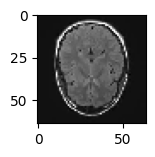

Tumorous


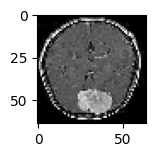

Non-tumorous


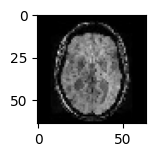

Tumorous


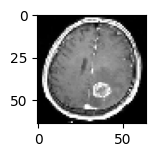

Non-tumorous


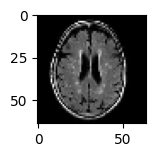

Non-tumorous


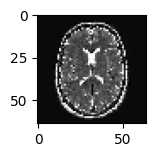

Tumorous


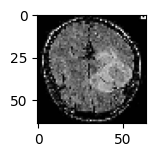

Non-tumorous


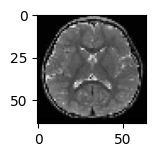

Tumorous


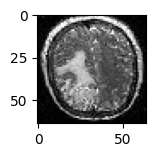

ValueError: num must be 1 <= num <= 12, not 0

<Figure size 640x480 with 0 Axes>

In [5]:
for i in range(10):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    if y_train[i] == 0:
        print("Non-tumorous")
    else:
        print("Tumorous")
    plt.show()

## Designing the Model

#### Number of Convolutions:
2 Convolutions: average accuracy = 85%<br>
3 Convolutions: average accuracy = 93%

#### Output Activation Function:
Softmax: average accuracy = 50%<br>
Sigmoid: average accuracy = 92%

#### Observations:
Two convolutions did not provide enough complexity for the model to accurately classify these images; however, three convolutions did. The Softmax activation function did not provide accurate results because it is meant to be used in multi-class classification problems; however, the Sigmoid activation function proved to be highly accurate because it was designed for binary classification problems such as this.

In [41]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training with K-Fold Cross Validation
Fine-tuning our model requires establishing a baseline model, then making modifications to achieve better results. But here's the catch: you cannot test your model on the test set until the model is complete. Doing so would result in what is called <b>[data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/)</b>, which is similar to being given a study guide that contains the same questions and answers that will be on the actual exam. To avoid this, we use <b>K-Fold Cross Validation</b> (KFCV). KFCV works by taking a portion of data in the train set and placing it into a validation set. If we specify that we want <i>k</i> number of folds, the model will be trained <i>k</i> times, each time with a unique partition of data in the train and validation sets. This provides a good approximation of how the model will perform during the final test, without using the actual test set.

In [43]:
splitter = KFold(n_splits=5)
fold = 0
accuracy_list = list()
for train_index, valid_index in splitter.split(X_train):
    fold += 1
    print('Fold', fold)
    print('Num images in train and valid sets:', len(train_index), len(valid_index))
    model = model
    start = datetime.now()
    history = model.fit(X_train[train_index], y_train[train_index], 
                        epochs=10, validation_data=(X_train[valid_index], y_train[valid_index]))
    end = datetime.now()
    elapsed = end-start
    print('Training time:', elapsed)   
    loss, acc = model.evaluate(X_train[valid_index], y_train[valid_index], verbose=0)
    acc = 100.0 * acc
    accuracy_list.append(acc)
    print("Fold %d validation accuracy: %.1f%%" % (fold, acc))
print('\nAccuracy across %d-fold cross validation:' % fold)
print(accuracy_list)
print('%.1f mean, %f stdev' % (np.mean(accuracy_list), np.std(accuracy_list)))

Fold 1
Num images in train and valid sets: 1920 480
Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 0.5787 - accuracy: 0.6922 - val_loss: 0.5260 - val_accuracy: 0.7437
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.5061 - accuracy: 0.7458 - val_loss: 0.5118 - val_accuracy: 0.7542
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4839 - accuracy: 0.7630 - val_loss: 0.4636 - val_accuracy: 0.7833
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4425 - accuracy: 0.7880 - val_loss: 0.4093 - val_accuracy: 0.8104
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4048 - accuracy: 0.8120 - val_loss: 0.3673 - val_accuracy: 0.8188
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3803 - accuracy: 0.8224 - val_loss: 0.3571 - val_accuracy: 0.8250
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3574 - accuracy: 0.8443 - val_loss

## Final Training (without Validation)
Once we are satisfied with our results from the K-Fold Cross Validation test, we are ready to train the final model. <b>Warning: you only get one shot at this step, so be sure you are completely confident in your model's performance before proceeding!</b>

In [44]:
start = datetime.now()
history = model.fit(X_train, y_train, epochs=10)
end = datetime.now()
elapsed = end-start
print('Elapsed time:', elapsed)

Epoch 1/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0746 - accuracy: 0.9750
Epoch 2/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0694 - accuracy: 0.9783
Epoch 3/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0734 - accuracy: 0.9737
Epoch 4/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0705 - accuracy: 0.9742
Epoch 5/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0605 - accuracy: 0.9817
Epoch 6/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0601 - accuracy: 0.9800
Epoch 7/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0550 - accuracy: 0.9833
Epoch 8/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9817
Epoch 9/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0445 - accuracy: 0.9850
Epoch 10/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0503 - accuracy: 0.9812
Elapsed time: 0:00:

## Testing the Model

In [45]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

19/19 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9667

Test accuracy: 96.7%


## Interpreting the Results
The mean K-Fold Cross Validation accuracy we achieved was 94.4%; the final test score we achieved was 96.7%. Therefore, we can conclude that KFCV was a good predictor of how well our model would perform on the final test set.